<a href="https://colab.research.google.com/github/Romeela/Bank-Marketing/blob/main/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
 accuracy_score, confusion_matrix, classification_report,
 roc_auc_score, roc_curve, auc,
)
company_data=pd.read_csv("/content/train_MpHjUjU.csv")
company_data


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [3]:
company_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [4]:
company_data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Emp_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19104.0,34.650283,6.264471e+00,21.0,30.0,34.0,39.0,58.0
Salary,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Designation,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [5]:
company_data.describe(include = [object]).transpose()

,count,unique,top,freq
MMM-YY,19104,24,2016-01-01,1022
Gender,19104,2,Male,11103
City,19104,29,C20,1008
Education_Level,19104,3,Bachelor,6864
Dateofjoining,19104,869,2012-07-23,192
LastWorkingDate,1616,493,2017-07-29,70


In [6]:
def feature_names(df):
    
    print(f"Columns with category datatypes (Categorical Features) are : \
    {list(df.select_dtypes('object').columns)}")
    print('-'*125)
    print('-'*125)
    print(f"Columns with integer and float datatypes (Numerical Features) are: \
    {list(df.select_dtypes(['int64','float64']).columns)}")

In [7]:
feature_names(company_data)

Columns with category datatypes (Categorical Features) are :     ['MMM-YY', 'Gender', 'City', 'Education_Level', 'Dateofjoining', 'LastWorkingDate']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Emp_ID', 'Age', 'Salary', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating']


In [8]:
def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [9]:
missing_df = missingValue(company_data)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  19104 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,17488,91.54


In [10]:
company_data_1 = company_data.copy()

In [11]:
company_data['Emp_ID'].unique()

array([   1,    2,    4, ..., 2786, 2787, 2788])

In [12]:
company_data['Emp_ID'].nunique()

2381

In [13]:
temp_rating = company_data[['Emp_ID','Quarterly Rating']].groupby('Emp_ID').first().reset_index()

In [14]:
temp_rating['Quarterly_Rating_first'] = temp_rating['Quarterly Rating']
temp_rating['Quarterly_Rating_last'] =  company_data[['Emp_ID','Quarterly Rating']].groupby('Emp_ID').last().reset_index()['Quarterly Rating']
temp_rating['quarterly_performance'] = np.where(temp_rating['Quarterly_Rating_last'] - temp_rating['Quarterly_Rating_first'] > 0, 1,0)
temp_rating

,Emp_ID,Quarterly Rating,Quarterly_Rating_first,Quarterly_Rating_last,quarterly_performance
0,1,2,2,2,0
1,2,1,1,1,0
2,4,1,1,1,0
3,5,1,1,1,0
4,6,1,1,2,1
...,...,...,...,...,...
2376,2784,3,3,4,1
2377,2785,1,1,1,0
2378,2786,2,2,1,0
2379,2787,2,2,1,0


In [15]:
temp_rating.drop(['Quarterly Rating','Quarterly_Rating_first','Quarterly_Rating_last'], axis= 1, inplace = True)
temp_rating

,Emp_ID,quarterly_performance
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,1
2377,2785,0
2378,2786,0
2379,2787,0


In [16]:
temp_Salary = company_data[['Emp_ID','Salary']].groupby('Emp_ID').first().reset_index()
temp_Salary['last'] = company_data[['Emp_ID','Salary']].groupby('Emp_ID').last().reset_index()['Salary']
temp_Salary['Salary_increment'] = np.where(temp_Salary['last'] - temp_Salary['Salary'] > 0, 1,0)
temp_Salary

,Emp_ID,Salary,last,Salary_increment
0,1,57387,57387,0
1,2,67016,67016,0
2,4,65603,65603,0
3,5,46368,46368,0
4,6,78728,78728,0
...,...,...,...,...
2376,2784,82815,82815,0
2377,2785,12105,12105,0
2378,2786,35370,35370,0
2379,2787,69498,69498,0


In [17]:
temp_Salary.drop(['Salary','last'], axis= 1, inplace = True)
temp_Salary

,Emp_ID,Salary_increment
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,0
2379,2787,0


In [18]:
Emp_ID_dict = {
    'MMM-YY' :'first',
    'Emp_ID' :'first',
    'Age' :'last',
    'City' : 'first',
    'Gender' :'first',
    'Education_Level' :'first',
    'Salary':'first',
    'Dateofjoining' :'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' :'first',
    'Designation' :'first',
    'Quarterly Rating' :'mean',
    'Total Business Value' :'sum'   
}

In [19]:
Emp_ID_dict_df = company_data.groupby('Emp_ID').agg(Emp_ID_dict).reset_index(drop = True)
Emp_ID_dict_df

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,None,2,2,1.000000,0
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,None,3,3,1.600000,1265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,None,2,3,2.625000,21748820
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830


In [20]:
Emp_ID_dict_df['LastWorkingDate'].nunique() == company_data['LastWorkingDate'].nunique()

True

In [21]:
unique_employee_array = Emp_ID_dict_df['Emp_ID'].unique()
unique_employee_array

array([   1,    2,    4, ..., 2786, 2787, 2788])

In [22]:
cnt = 0
Emp_IDs_not_present = []
for i in range(1,2789):
    if i not in unique_employee_array:
        Emp_IDs_not_present.append(i)
        cnt+=1
print(cnt)

407


In [23]:
unique_employee_array_org = company_data['Emp_ID'].unique()
unique_employee_array_org

array([   1,    2,    4, ..., 2786, 2787, 2788])

In [24]:
cnt = 0
Emp_IDs_not_present_org = []
for i in range(1,2789):
    if i not in unique_employee_array_org:
        Emp_IDs_not_present_org.append(i)
        cnt+=1
print(cnt)

407


In [25]:
Emp_IDs_not_present == Emp_IDs_not_present_org

True

In [26]:
Emp_ID_dict_df.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'City', 'Gender', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Quarterly Rating', 'Total Business Value'],
      dtype='object')

In [27]:
missing_df_new = missingValue(Emp_ID_dict_df)
missing_df_new[missing_df_new['Total Missing'] > 0]


Total records in our data =  2381 where missing values are as follows:


,Total Missing,In Percent
LastWorkingDate,765,32.13


In [28]:
Emp_ID_dict_df['target'] = Emp_ID_dict_df['LastWorkingDate'].apply(lambda x: 0 if x == None else 1)

In [29]:
Emp_ID_dict_df

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580,1
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,None,2,2,1.000000,0,0
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000,1
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360,1
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,None,3,3,1.600000,1265000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,None,2,3,2.625000,21748820,0
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0,1
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090,1
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830,1


In [30]:
company_df_1 = pd.merge(Emp_ID_dict_df,temp_rating ,how='inner', on = 'Emp_ID')
company_data_final = pd.merge(company_df_1,temp_Salary ,how='inner', on = 'Emp_ID')
company_data_final

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580,1,0,0
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,None,2,2,1.000000,0,0,0,0
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000,1,0,0
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360,1,0,0
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,None,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,None,2,3,2.625000,21748820,0,1,0
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0,1,0,0
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090,1,0,0
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830,1,0,0


In [31]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MMM-YY                 2381 non-null   object 
 1   Emp_ID                 2381 non-null   int64  
 2   Age                    2381 non-null   int64  
 3   City                   2381 non-null   object 
 4   Gender                 2381 non-null   object 
 5   Education_Level        2381 non-null   object 
 6   Salary                 2381 non-null   int64  
 7   Dateofjoining          2381 non-null   object 
 8   LastWorkingDate        1616 non-null   object 
 9   Joining Designation    2381 non-null   int64  
 10  Designation            2381 non-null   int64  
 11  Quarterly Rating       2381 non-null   float64
 12  Total Business Value   2381 non-null   int64  
 13  target                 2381 non-null   int64  
 14  quarterly_performance  2381 non-null   int64  
 15  Sala

In [32]:
company_data_final['MMM-YY'].nunique()

24

In [33]:
company_data_final['MMM-YY']=pd.to_datetime(company_data_final['MMM-YY'])
company_data_final['MMM-YY'].value_counts()

2016-01-01    1022
2016-11-01     104
2017-07-01     100
2017-08-01      94
2016-07-01      86
2017-05-01      83
2016-12-01      80
2017-12-01      78
2017-06-01      73
2017-04-01      71
2017-10-01      70
2017-09-01      66
2016-10-01      65
2016-06-01      58
2017-01-01      56
2016-09-01      55
2016-08-01      55
2017-11-01      49
2017-02-01      49
2017-03-01      36
2016-05-01      17
2016-04-01       7
2016-02-01       6
2016-03-01       1
Name: MMM-YY, dtype: int64

In [34]:
company_data_2 = company_data_final.copy()

company_data_2['reporting_year'] = company_data_2['MMM-YY'].dt.year
#2
company_data_2['reporting_month'] = company_data_2['MMM-YY'].dt.month
#3
company_data_2['reporting_day_of_week'] = company_data_2['MMM-YY'].dt.day_of_week

In [35]:
company_data_2

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580,1,0,0,2016,1,4
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,None,2,2,1.000000,0,0,0,0,2017,11,2
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000,1,0,0,2016,12,3
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360,1,0,0,2016,1,4
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,None,3,3,1.600000,1265000,0,1,0,2017,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,None,2,3,2.625000,21748820,0,1,0,2016,1,4
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0,1,0,0,2017,8,1
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090,1,0,0,2016,1,4
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830,1,0,0,2016,1,4


In [36]:
company_data_2['reporting_year'].value_counts()

2016    1556
2017     825
Name: reporting_year, dtype: int64

In [37]:
company_data_2['reporting_month'].value_counts()

1     1078
7      186
12     158
11     153
8      149
10     135
6      131
9      121
5      100
4       78
2       55
3       37
Name: reporting_month, dtype: int64

In [38]:
company_data_final['Dateofjoining']=pd.to_datetime(company_data_final['Dateofjoining'])
company_data_final['Dateofjoining'].value_counts()


2017-07-31    31
2017-09-28    30
2017-05-29    20
2016-10-31    18
2017-05-01    17
              ..
2010-10-21     1
2017-08-17     1
2015-01-26     1
2010-06-02     1
2017-08-28     1
Name: Dateofjoining, Length: 869, dtype: int64

In [39]:
company_data_2['Dateofjoining']=pd.to_datetime(company_data_2['Dateofjoining'])

In [40]:
company_data_2 = company_data_final.copy()

#1
company_data_2['joining_year'] = company_data_2['Dateofjoining'].dt.year
#2
company_data_2['joining_month'] = company_data_2['Dateofjoining'].dt.month
#3
company_data_2['joining_day_of_week'] = company_data_2['Dateofjoining'].dt.day_of_week

In [41]:
company_data_final['LastWorkingDate']=pd.to_datetime(company_data_final['LastWorkingDate'])
company_data_final['LastWorkingDate'].value_counts()

2017-07-29    70
2016-09-22    26
2016-03-17    14
2017-11-28    13
2017-02-17    13
              ..
2016-06-16     1
2017-11-17     1
2017-12-05     1
2016-09-02     1
2017-10-28     1
Name: LastWorkingDate, Length: 493, dtype: int64

In [42]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Emp_ID                 2381 non-null   int64         
 2   Age                    2381 non-null   int64         
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   object        
 5   Education_Level        2381 non-null   object        
 6   Salary                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Designation            2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

In [43]:
company_data_2 = company_data_final.copy()
company_data_2

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580,1,0,0
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,NaT,2,2,1.000000,0,0,0,0
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000,1,0,0
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360,1,0,0
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0,1,0,0
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090,1,0,0
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830,1,0,0


In [44]:
company_data_final['Emp_ID'].value_counts()

1       1
1859    1
1861    1
1862    1
1863    1
       ..
933     1
935     1
936     1
937     1
2788    1
Name: Emp_ID, Length: 2381, dtype: int64

In [45]:
company_data['Emp_ID'].nunique()

2381

In [46]:
company_data_final['Age'].value_counts().sort_values().head()

58    1
54    1
53    2
55    2
21    3
Name: Age, dtype: int64

In [47]:
company_data_final['Age'].max(),company_data_final['Age'].min()

(58, 21)

In [48]:
company_data_final['Salary'].max(),company_data_final['Salary'].min()

(188418, 10747)

In [49]:
bins_age=[18,25,35,45,55,65,100]  
bins_Salary = [10000, 25000, 50000, 75000,100000,188418]
label1=['18-25','25-35','35-45','45-55','55-65','65-100']
label2 = ['Low Salary','Moderate Salary','High Salary','Very High Salary','Extremely High Salary']
company_data_2['Age Groups']=pd.cut(company_data_2['Age'],bins_age,labels = label1)
company_data_2['Salary Groups'] = pd.cut(company_data_2['Salary'],bins_Salary,labels = label2)
company_data_2.head()

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,Age Groups,Salary Groups
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.0,1715580,1,0,0,25-35,High Salary
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,NaT,2,2,1.0,0,0,0,0,25-35,High Salary
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.0,350000,1,0,0,35-45,High Salary
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.0,120360,1,0,0,25-35,Moderate Salary
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,NaT,3,3,1.6,1265000,0,1,0,25-35,Very High Salary


In [50]:
company_data_final['Total Business Value'].value_counts().sort_values()

1886720       1
6962550       1
7539490       1
4101720       1
36351110      1
           ... 
600000        4
350000        5
250000        6
200000       10
0           719
Name: Total Business Value, Length: 1629, dtype: int64

In [51]:
company_data_final['quarterly_performance'] = company_data_final['quarterly_performance'].astype('int64')
company_data_final['Salary_increment'] = company_data_final['Salary_increment'].astype('int64')

In [52]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MMM-YY                 2381 non-null   datetime64[ns]
 1   Emp_ID                 2381 non-null   int64         
 2   Age                    2381 non-null   int64         
 3   City                   2381 non-null   object        
 4   Gender                 2381 non-null   object        
 5   Education_Level        2381 non-null   object        
 6   Salary                 2381 non-null   int64         
 7   Dateofjoining          2381 non-null   datetime64[ns]
 8   LastWorkingDate        1616 non-null   datetime64[ns]
 9   Joining Designation    2381 non-null   int64         
 10  Designation            2381 non-null   int64         
 11  Quarterly Rating       2381 non-null   float64       
 12  Total Business Value   2381 non-null   int64         
 13  tar

<ipython-input-53-d4b33a3b573b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
<ipython-input-53-d4b33a3b573b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')
<ipython-input-53-d4b33a3b573b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(company_data_final.corr(), annot = True, fmt='.2f', linewidths=.3, ax = ax ,cmap='RdPu')


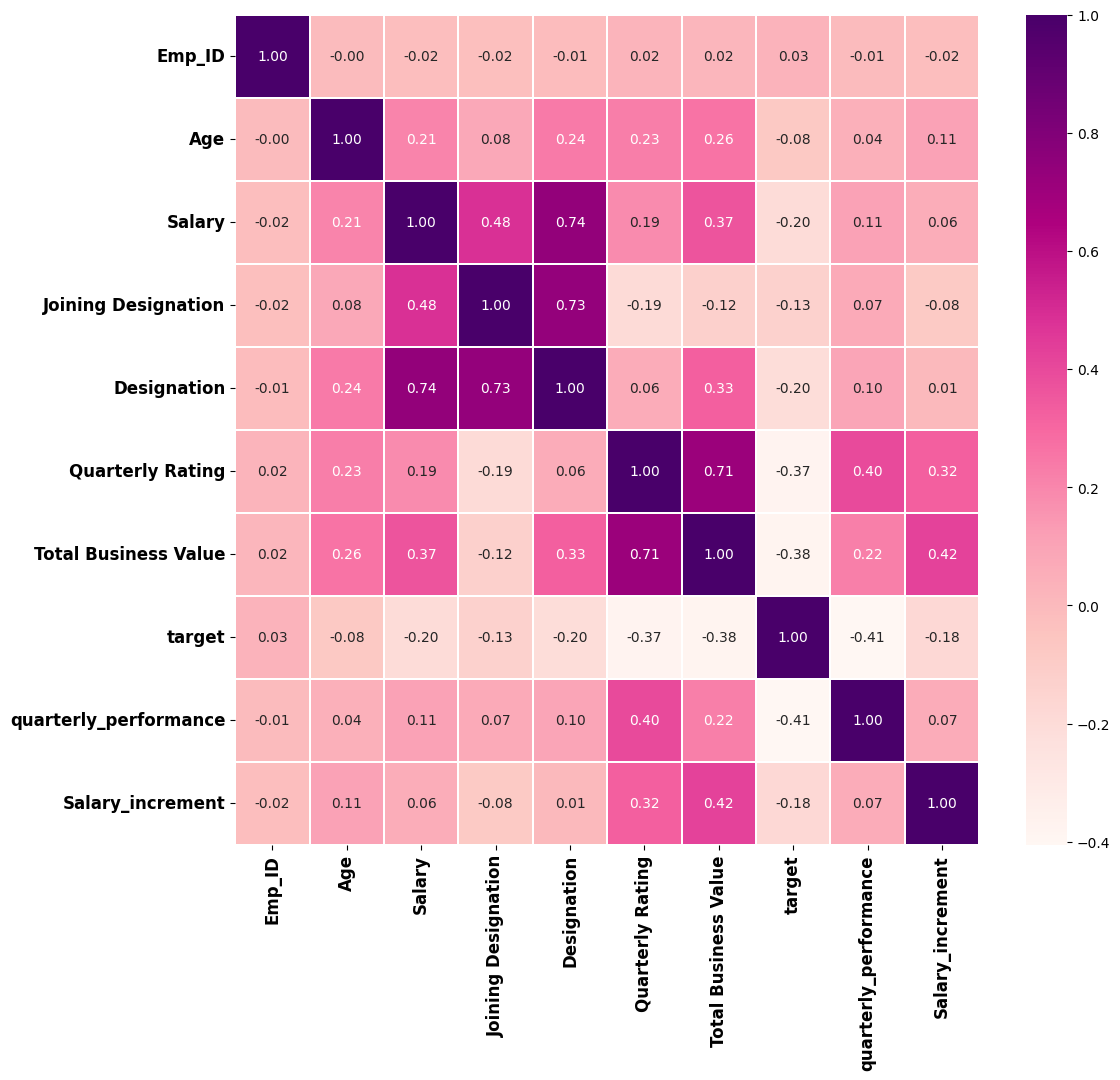

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.subplots_adjust(top=.94)

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

sns.heatmap(company_data_final.corr(), annot = True, fmt='.2f', linewidths=.3, ax = ax ,cmap='RdPu')
plt.show()

In [54]:
company_data_final

,MMM-YY,Emp_ID,Age,City,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment
0,2016-01-01,1,28,C23,Male,Master,57387,2015-12-24,2016-03-11,1,1,2.000000,1715580,1,0,0
1,2017-11-01,2,31,C7,Male,Master,67016,2017-11-06,NaT,2,2,1.000000,0,0,0,0
2,2016-12-01,4,43,C13,Male,Master,65603,2016-12-07,2017-04-27,2,2,1.000000,350000,1,0,0
3,2016-01-01,5,29,C9,Male,College,46368,2016-01-09,2016-03-07,1,1,1.000000,120360,1,0,0
4,2017-08-01,6,31,C11,Female,Bachelor,78728,2017-07-31,NaT,3,3,1.600000,1265000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,2784,34,C24,Male,College,82815,2012-10-15,NaT,2,3,2.625000,21748820,0,1,0
2377,2017-08-01,2785,34,C9,Female,College,12105,2017-08-28,2017-10-28,1,1,1.000000,0,1,0,0
2378,2016-01-01,2786,45,C19,Male,College,35370,2015-07-31,2016-09-22,2,2,1.666667,2815090,1,0,0
2379,2016-01-01,2787,28,C20,Female,Master,69498,2015-07-21,2016-06-20,1,1,1.500000,977830,1,0,0


In [55]:
#1
company_data_final['reporting_year'] = company_data_final['MMM-YY'].dt.year
#2
company_data_final['reporting_month'] = company_data_final['MMM-YY'].dt.month
#3
company_data_final['reporting_day_of_week'] = company_data_final['MMM-YY'].dt.day_of_week
#1
company_data_final['joining_year'] = company_data_final['Dateofjoining'].dt.year
#2
company_data_final['joining_month'] = company_data_final['Dateofjoining'].dt.month
#3
company_data_final['joining_day_of_week'] = company_data_final['Dateofjoining'].dt.day_of_week

In [56]:
# dropping unwanted features

company_data_final.drop(['Emp_ID','MMM-YY', 'Dateofjoining', 'LastWorkingDate'], axis=1, inplace=True)

In [57]:
from pandas.api.types import is_numeric_dtype
company_col = list(company_data_final.columns)
for col in company_col:
    if is_numeric_dtype(company_data_final[col])== False:
        print(col)

City
Gender
Education_Level


In [58]:
company_data_final

,Age,City,Gender,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
0,28,C23,Male,Master,57387,1,1,2.000000,1715580,1,0,0,2016,1,4,2015,12,3
1,31,C7,Male,Master,67016,2,2,1.000000,0,0,0,0,2017,11,2,2017,11,0
2,43,C13,Male,Master,65603,2,2,1.000000,350000,1,0,0,2016,12,3,2016,12,2
3,29,C9,Male,College,46368,1,1,1.000000,120360,1,0,0,2016,1,4,2016,1,5
4,31,C11,Female,Bachelor,78728,3,3,1.600000,1265000,0,1,0,2017,8,1,2017,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34,C24,Male,College,82815,2,3,2.625000,21748820,0,1,0,2016,1,4,2012,10,0
2377,34,C9,Female,College,12105,1,1,1.000000,0,1,0,0,2017,8,1,2017,8,0
2378,45,C19,Male,College,35370,2,2,1.666667,2815090,1,0,0,2016,1,4,2015,7,4
2379,28,C20,Female,Master,69498,1,1,1.500000,977830,1,0,0,2016,1,4,2015,7,1


In [59]:
# target -> 1:known LWD 0: Unknown LWD

company_data_final["target"].value_counts(normalize = True)

1    0.678706
0    0.321294
Name: target, dtype: float64

In [60]:
company_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2381 non-null   int64  
 1   City                   2381 non-null   object 
 2   Gender                 2381 non-null   object 
 3   Education_Level        2381 non-null   object 
 4   Salary                 2381 non-null   int64  
 5   Joining Designation    2381 non-null   int64  
 6   Designation            2381 non-null   int64  
 7   Quarterly Rating       2381 non-null   float64
 8   Total Business Value   2381 non-null   int64  
 9   target                 2381 non-null   int64  
 10  quarterly_performance  2381 non-null   int64  
 11  Salary_increment       2381 non-null   int64  
 12  reporting_year         2381 non-null   int64  
 13  reporting_month        2381 non-null   int64  
 14  reporting_day_of_week  2381 non-null   int64  
 15  join

In [61]:
feature_names(company_data_final)

Columns with category datatypes (Categorical Features) are :     ['City', 'Gender', 'Education_Level']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Age', 'Salary', 'Joining Designation', 'Designation', 'Quarterly Rating', 'Total Business Value', 'target', 'quarterly_performance', 'Salary_increment', 'reporting_year', 'reporting_month', 'reporting_day_of_week', 'joining_year', 'joining_month', 'joining_day_of_week']


In [62]:
company_data_final["target"].value_counts(normalize = True)

1    0.678706
0    0.321294
Name: target, dtype: float64

In [63]:
from pandas.api.types import is_numeric_dtype
company_col = list(company_data_final.columns)
for col in company_col:
    if is_numeric_dtype(company_data_final[col])== False:
        print(col)

City
Gender
Education_Level


In [64]:
company_data_final['Gender'] = company_data_final['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [65]:
company_data_final['Gender'].value_counts()

0    1404
1     977
Name: Gender, dtype: int64

In [66]:
company_data_final['Education_Level'].value_counts()

Master      802
Bachelor    795
College     784
Name: Education_Level, dtype: int64

In [67]:
company_data_final['Education_Level'] = company_data_final['Education_Level'].map({'College':0,'Bachelor':1,'Master':2})
company_data_final['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

In [68]:
company_data_final

,Age,City,Gender,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Total Business Value,target,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
0,28,C23,0,2,57387,1,1,2.000000,1715580,1,0,0,2016,1,4,2015,12,3
1,31,C7,0,2,67016,2,2,1.000000,0,0,0,0,2017,11,2,2017,11,0
2,43,C13,0,2,65603,2,2,1.000000,350000,1,0,0,2016,12,3,2016,12,2
3,29,C9,0,0,46368,1,1,1.000000,120360,1,0,0,2016,1,4,2016,1,5
4,31,C11,1,1,78728,3,3,1.600000,1265000,0,1,0,2017,8,1,2017,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34,C24,0,0,82815,2,3,2.625000,21748820,0,1,0,2016,1,4,2012,10,0
2377,34,C9,1,0,12105,1,1,1.000000,0,1,0,0,2017,8,1,2017,8,0
2378,45,C19,0,0,35370,2,2,1.666667,2815090,1,0,0,2016,1,4,2015,7,4
2379,28,C20,1,2,69498,1,1,1.500000,977830,1,0,0,2016,1,4,2015,7,1


In [69]:
# Assigning the featurs as X and target as y
# target -> 1:known LWD 0: Unknown LWD

X= company_data_final.drop(["target"],axis =1)
y= company_data_final["target"]

In [70]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [71]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [72]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_CV dataset: ", X_val.shape)
print("Number transactions y_CV dataset: ", y_val.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1523, 17)
Number transactions y_train dataset:  (1523,)
Number transactions X_CV dataset:  (381, 17)
Number transactions y_CV dataset:  (381,)
Number transactions X_test dataset:  (477, 17)
Number transactions y_test dataset:  (477,)


In [73]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 7.8 MB/s eta 0:00:00


In [74]:
#Converting city from category to numerical via target encoding for Train data:

from category_encoders import TargetEncoder
encoder = TargetEncoder()
X_train['City'] = encoder.fit_transform(X_train['City'], y_train)

In [75]:
#Converting city from category to numerical via target encoding for cv data:

X_val['City'] = encoder.transform(X_val['City'], y_val)

In [76]:
#Converting city from category to numerical via target encoding for test data:

X_test['City'] = encoder.transform(X_test['City'], y_test)

In [77]:
X_train

,Age,City,Gender,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Total Business Value,quarterly_performance,Salary_increment,reporting_year,reporting_month,reporting_day_of_week,joining_year,joining_month,joining_day_of_week
160,34,0.671881,0,1,20922,2,2,1.000000,151600,0,0,2016,11,1,2016,11,2
1643,37,0.494747,0,1,67317,1,2,1.000000,1061950,0,0,2016,1,4,2013,11,3
1159,43,0.643642,1,1,87325,3,3,1.000000,566440,0,0,2017,4,5,2017,4,1
499,30,0.613089,1,2,70570,1,2,1.428571,1583300,0,0,2016,1,4,2014,6,0
1214,33,0.680316,1,1,70900,1,1,1.500000,1741830,0,0,2016,1,4,2015,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34,0.634724,0,0,82815,2,3,2.625000,21748820,1,0,2016,1,4,2012,10,0
652,37,0.671881,1,1,18285,1,1,1.000000,386590,0,0,2016,1,4,2015,11,0
1943,27,0.506750,1,2,83632,2,2,2.000000,371110,0,0,2017,11,2,2017,11,1
1066,38,0.692755,1,1,130277,3,3,1.000000,988020,0,0,2016,7,4,2016,7,0


In [78]:
# Hyper-pram tuning + DT model
# target(1) -> 1:known LWD (0.68)
# target(0) -> 0:Unknown LWD (0.32)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=2.32

for depth in np.arange(l,u,d):
    clf = DecisionTreeClassifier(random_state=0, max_depth=depth, class_weight={ 0:0.68, 1:w } )
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    val_y_pred = clf.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

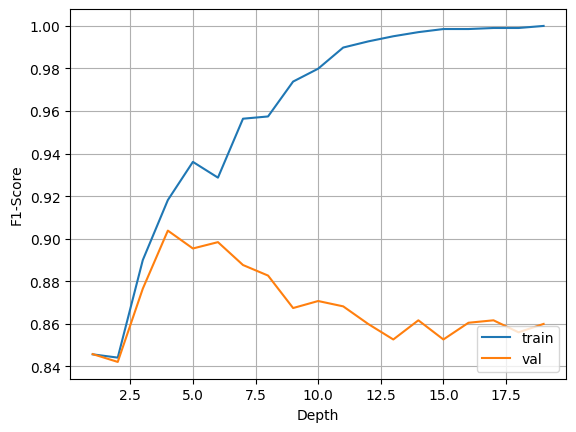

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [80]:
best_idx = np.argmax(val_scores)
best_idx

3

In [81]:
val_scores

[0.8457711442786069,
 0.8421052631578947,
 0.8765217391304349,
 0.9038112522686025,
 0.8954128440366972,
 0.8983957219251337,
 0.8876404494382022,
 0.8826815642458101,
 0.8674242424242424,
 0.870722433460076,
 0.8682170542635659,
 0.859922178988327,
 0.8526522593320236,
 0.8616600790513833,
 0.8526522593320236,
 0.8605108055009824,
 0.8616600790513833,
 0.8560157790927022,
 0.8599605522682445]

In [82]:
l+d*best_idx

4

In [83]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
print(l_best)
clf = DecisionTreeClassifier(random_state=0, max_depth=l_best, class_weight={ 0:0.68, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

4
0.9038112522686025


array([[ 79,  37],
       [ 16, 249]])

In [84]:
test_score = clf.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = clf.predict(X_test)

0.859538784067086


In [85]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 85.9538784067086%
recall_score : 94.80122324159022%
precision_score : 86.11111111111111%
f1_score : 90.24745269286754%
confusion_matrix :
[[100  50]
 [ 17 310]]


In [86]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the insurance company  100  -TN           50   -FP
# leaving the insurance company      17   -FN           310  -TP
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

                                   precision    recall  f1-score   support

Not leaving the insurance company       0.85      0.67      0.75       150
    leaving the insurance company       0.86      0.95      0.90       327

                         accuracy                           0.86       477
                        macro avg       0.86      0.81      0.83       477
                     weighted avg       0.86      0.86      0.85       477



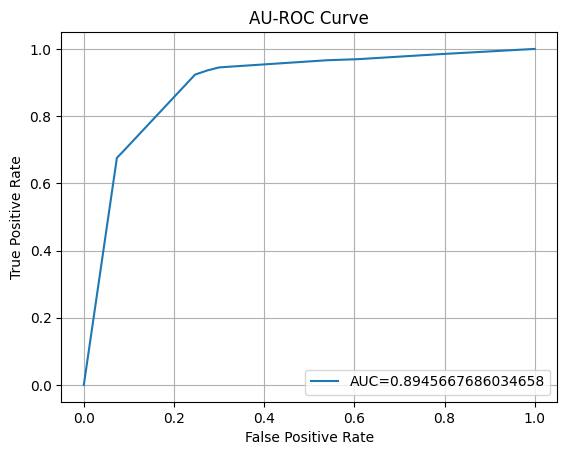

AUC SCORE :0.8945667686034658


In [88]:
# AUC- ROC

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

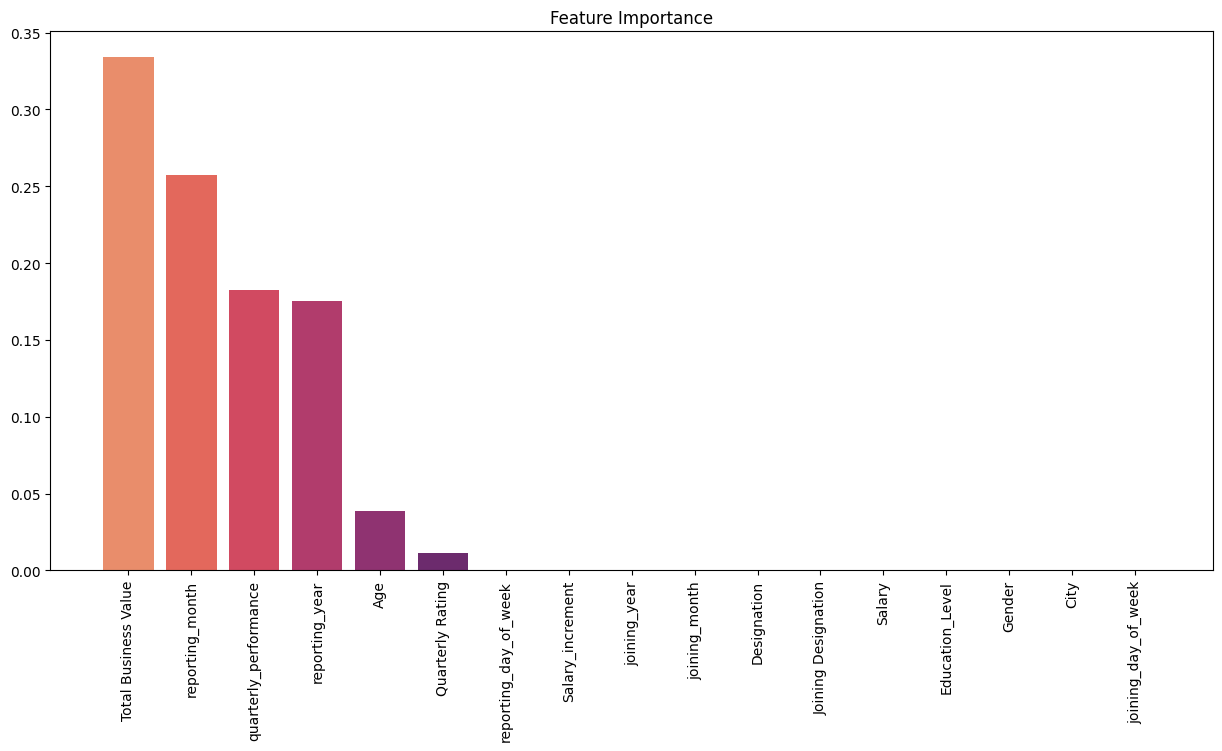

In [89]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() 

In [90]:
# Simple DT
# 5-fold CV
# Grid Search for best hyper-param
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7, 9],
    "max_leaf_nodes" : [15, 20, 25, 30]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "f1", cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_leaf_nodes': [15, 20, 25, 30]},
             scoring='f1')

In [91]:
res = clf.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.9012849967711507 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.9012849967711507 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.9012849967711507 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 30} Mean_score: 0.9012849967711507 Rank: 13
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.9224577275731161 Rank: 10
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.9226880459848326 Rank: 9
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.921155296486566 Rank: 11
Parameters:{'max_depth': 5, 'max_leaf_nodes': 30} Mean_score: 0.9191957336873802 Rank: 12
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.9307381216391224 Rank: 4
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.9339488567869921 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.9315148452490494 Rank: 3
Parameters:{'ma

In [92]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)


In [93]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):

    train_sizes, train_scores, test_scores,fit_times,score_times= learning_curve(estimator,X,y,return_times=True)

    fig, axes = plt.subplots(1, 1, figsize = (10, 5))

    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
    )
    axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
    )
    axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    plt.show()

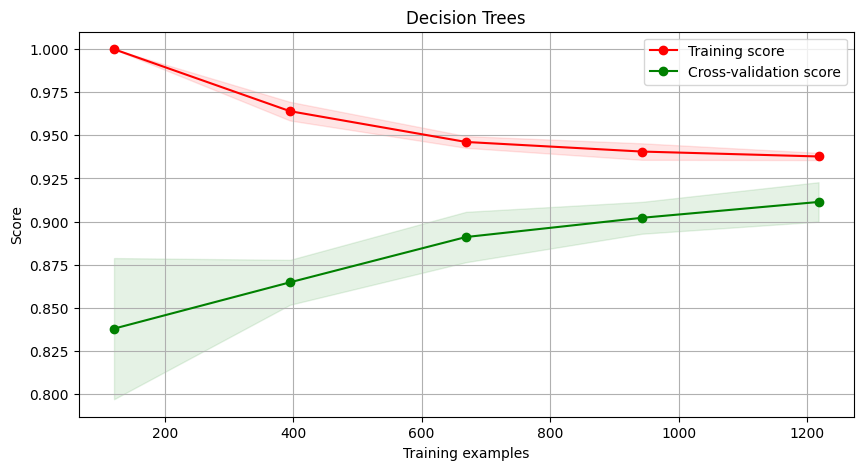

0.9336835193696651


In [94]:
model_kcv = clf.best_estimator_

model_kcv.fit(X_train, y_train)

plot_learning_curve(model_kcv, X_train, y_train, "Decision Trees")

print(model_kcv.score(X_train, y_train))

# more data could help as CV-score is improving as datset size increases.

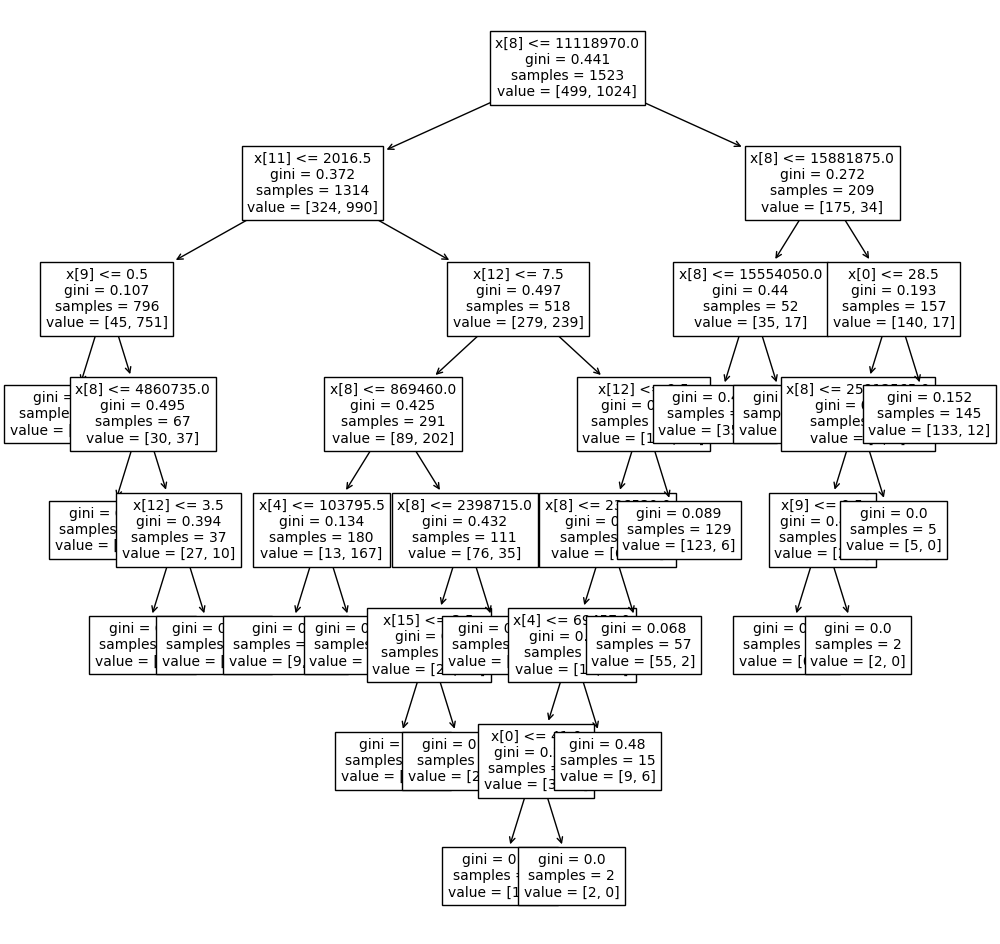

In [95]:
# plot the decision tree
from sklearn import tree

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model_kcv, fontsize=10)
plt.show()

In [96]:
#Testing on test data

test_score = model_kcv.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = model_kcv.predict(X_test)

0.8867924528301887


In [97]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 88.67924528301887%
recall_score : 90.51987767584097%
precision_score : 92.78996865203762%
f1_score : 91.64086687306501%
confusion_matrix :
[[127  23]
 [ 31 296]]


In [98]:
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

                                   precision    recall  f1-score   support

Not leaving the insurance company       0.80      0.85      0.82       150
    leaving the insurance company       0.93      0.91      0.92       327

                         accuracy                           0.89       477
                        macro avg       0.87      0.88      0.87       477
                     weighted avg       0.89      0.89      0.89       477



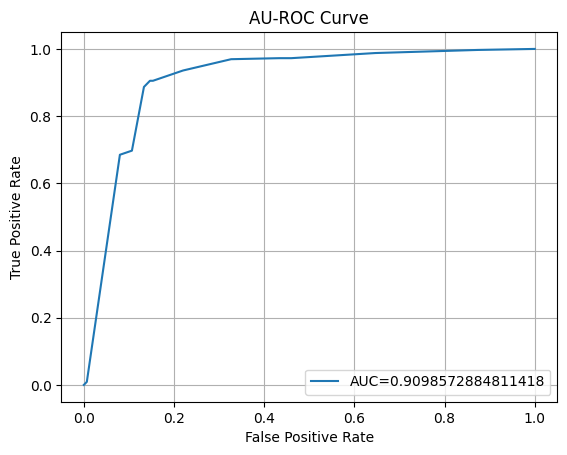

In [99]:
# AUC- ROC

y_pred_proba = model_kcv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()

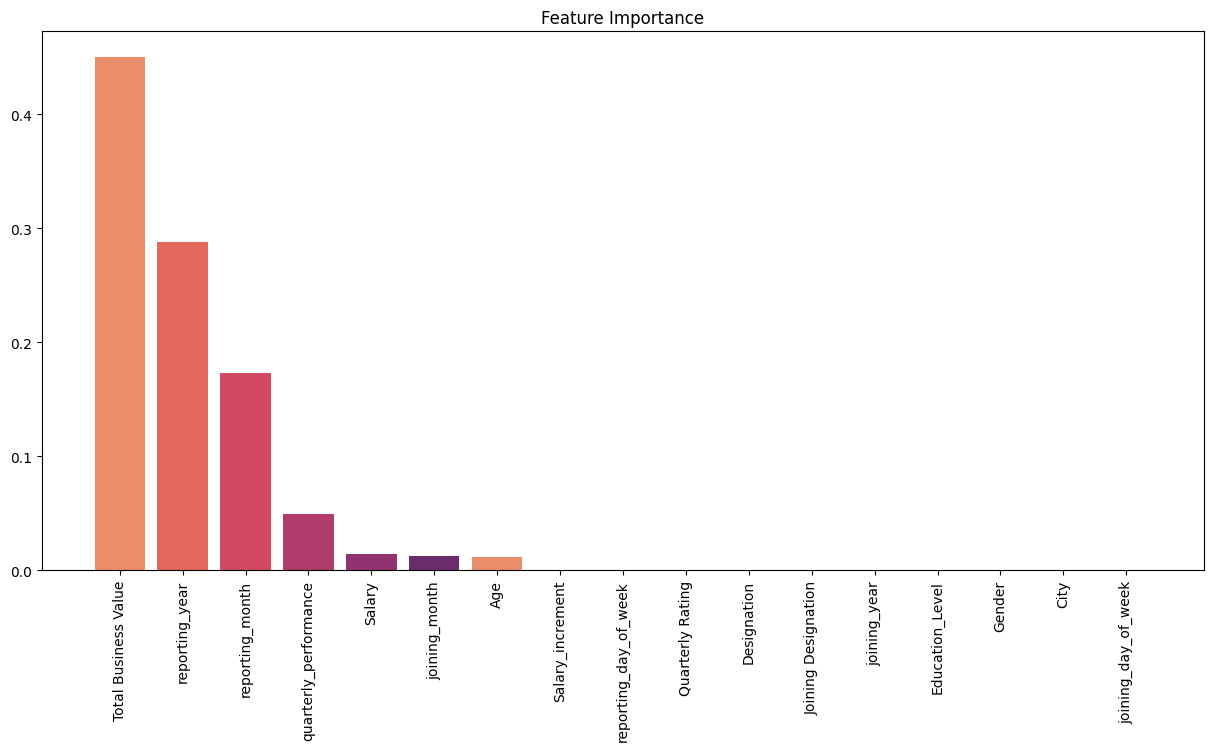

In [100]:
# Feature importance
importances = model_kcv.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

train_scores = []
val_scores = []

l=1
u=20
d=1
w=2.32
num_learners=100
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
    clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate,\
                                 n_estimators=num_learners, random_state=42, oob_score=True, class_weight={ 0:0.68, 1:w } )
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    val_y_pred = clf.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

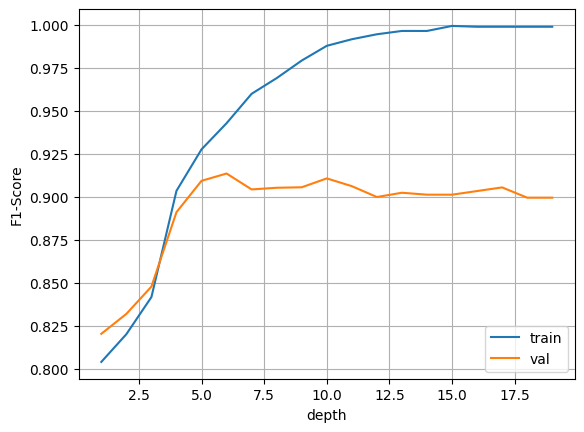

In [103]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [104]:
# Model with depth_best
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
print(f"l_best:{l_best}")
clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate,\
                             n_estimators=num_learners, random_state=42, class_weight={ 0:0.68, 1:w } )
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(f"val_score:{val_score}")

confusion_matrix(y_val, y_pred_val)

l_best:6
val_score:0.9136690647482014


array([[ 79,  37],
       [ 11, 254]])

In [105]:
#Testing on test data

test_score = clf.score(X_test, y_test) # Bydefault -> accuracy score
print(test_score)

y_pred = clf.predict(X_test)

0.8658280922431866


In [106]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 86.58280922431865%
recall_score : 96.63608562691131%
precision_score : 85.63685636856368%
f1_score : 90.80459770114942%
confusion_matrix :
[[ 97  53]
 [ 11 316]]


In [107]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"specificity: {np.round((TN/(TN+FP)),2)}")

from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred, target_names=['Not leaving the insurance company','leaving the insurance company'])}")

sensitivity: 0.97
specificity: 0.65
                                   precision    recall  f1-score   support

Not leaving the insurance company       0.90      0.65      0.75       150
    leaving the insurance company       0.86      0.97      0.91       327

                         accuracy                           0.87       477
                        macro avg       0.88      0.81      0.83       477
                     weighted avg       0.87      0.87      0.86       477



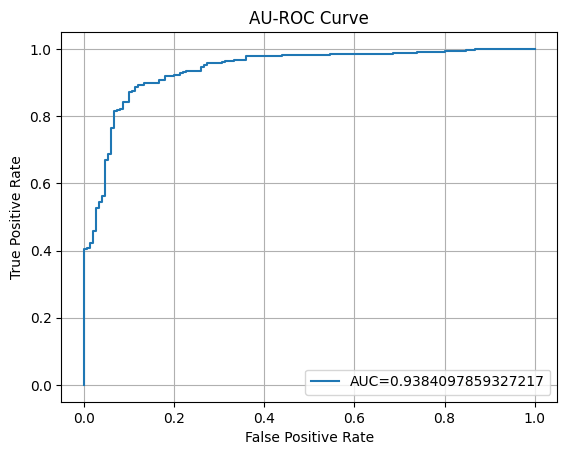

AUC SCORE :0.9384097859327217


In [108]:
# AUC- ROC

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

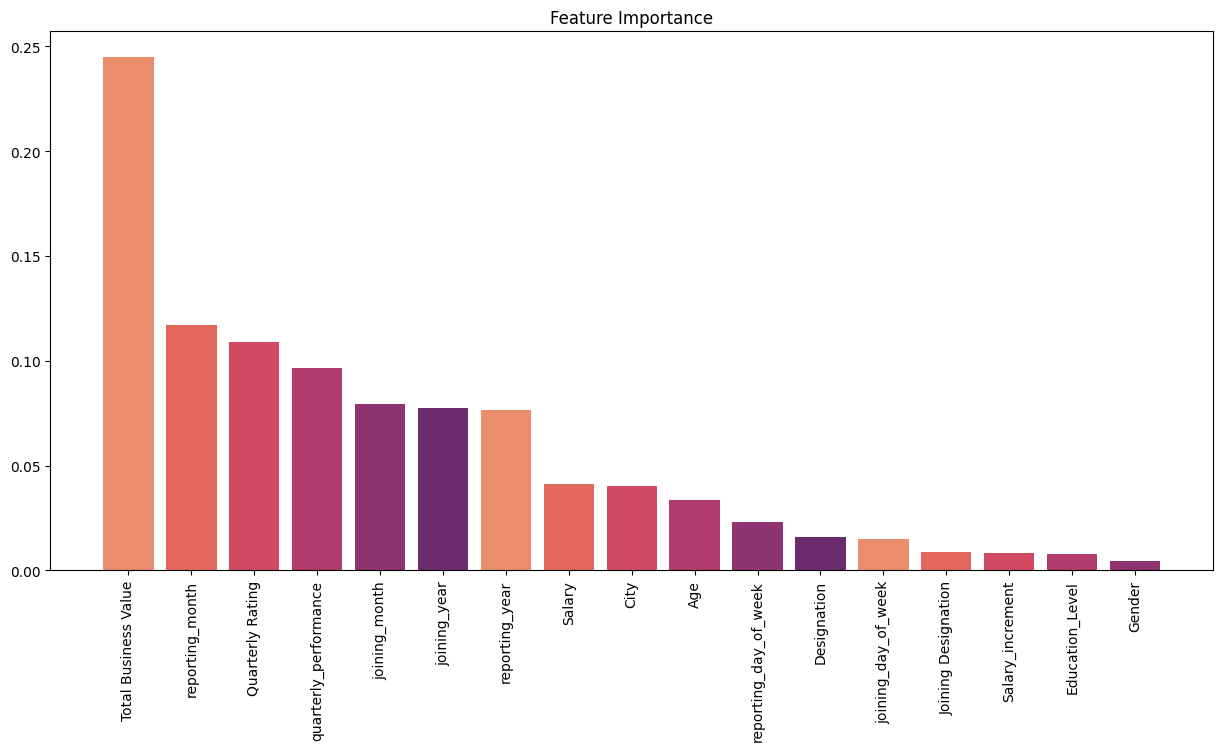

In [109]:
# Feature importance

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()